In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv")
df

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369
...,...,...,...,...,...,...,...,...,...,...,...
9699,140,5.0,164.0,2981.107371,17.3,2013,Europe,Diesel,Front-wheel drive,NaN,15.101802
9700,180,NaN,154.0,2439.525729,15.0,2004,USA,Gasoline,All-wheel drive,0.0,17.962326
9701,220,2.0,138.0,2583.471318,15.1,2008,USA,Diesel,All-wheel drive,-1.0,17.186587
9702,230,4.0,177.0,2905.527390,19.4,2011,USA,Diesel,Front-wheel drive,1.0,15.331551


**Preparing the dataset**

Use only the following columns:

- 'engine_displacement',
- 'horsepower',
- 'vehicle_weight',
- 'model_year',
- 'fuel_efficiency_mpg'

In [3]:
df = df[['engine_displacement','horsepower','vehicle_weight','model_year','fuel_efficiency_mpg']]

**EDA**

Look at the fuel_efficiency_mpg variable. Does it have a long tail?


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

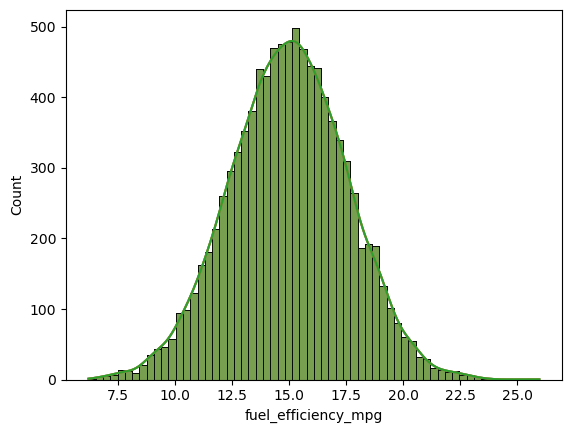

In [7]:
sns.histplot(df.fuel_efficiency_mpg, kde=True)
plt.show()

We have a perfect normal distribution.

### Question 1
**There's one column with missing values. What is it?**

- 'engine_displacement'
- 'horsepower'
- 'vehicle_weight'
- 'model_year'

In [8]:
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

The only one column with missing values is 'horsepower' with 708 NaN values.

### Question 2
**What's the median (50% percentile) for variable 'horsepower'?**

- 49
- 99
- 149
- 199

In [9]:
df["horsepower"].median()

149.0

Median is 149.

### Prepare and split the dataset
- Shuffle the dataset (the filtered one you created above), use seed 42.
- Split your data in train/val/test sets, with 60%/20%/20% distribution.
- Use the same code as in the lectures

In [10]:
train_n = int(len(df)*0.6)
val_n = int(len(df)*0.2)
test_n = int(len(df)*0.2)

len(df) , train_n + val_n + test_n, train_n,val_n,test_n

(9704, 9702, 5822, 1940, 1940)

In [11]:
x_train = df.iloc[:train_n]
x_val = df.iloc[train_n: train_n +val_n]
x_test = df.iloc[train_n + val_n:]
len(x_train),len(x_val),len(x_test)

(5822, 1940, 1942)

In [12]:
np.random.seed(42)
idx = np.arange(len(df))
np.random.shuffle(idx)
idx

array([ 483, 7506, 8795, ..., 5390,  860, 7270])

In [13]:
x_train = df.iloc[idx[:train_n]]
x_val = df.iloc[idx[train_n: train_n +val_n]]
x_test = df.iloc[idx[train_n + val_n:]]


In [14]:
x_train.reset_index(drop = True,inplace = True)
x_val.reset_index(drop = True,inplace = True) 
x_test.reset_index(drop = True,inplace = True)

In [15]:
y_train = x_train.fuel_efficiency_mpg.values
y_val = x_val.fuel_efficiency_mpg.values
y_test = x_test.fuel_efficiency_mpg.values

In [18]:
del x_train["fuel_efficiency_mpg"]
del x_val["fuel_efficiency_mpg"]
del x_test["fuel_efficiency_mpg"] 

KeyError: 'fuel_efficiency_mpg'

### Question 3

- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using round(score, 2)

**Which option gives better RMSE?**

Options:

- With 0
- With mean
- Both are equally good

**Filling missing values with 0**

In [19]:
def prepare_data_zero(df):
    df = df.fillna(0)
    X = df.values
    return X

In [20]:
def train_linear_regression(X,y):
    X = np.column_stack((np.ones(X.shape[0], dtype=int), X))
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0],w_full[1:]


In [21]:
X_train = prepare_data_zero(x_train)
X_train

array([[ 220.        ,  144.        , 2535.88759124, 2009.        ],
       [ 160.        ,  141.        , 2741.17048439, 2019.        ],
       [ 230.        ,  155.        , 2471.88023726, 2017.        ],
       ...,
       [ 260.        ,  139.        , 2606.9729844 , 2009.        ],
       [ 280.        ,  132.        , 4004.21432295, 2014.        ],
       [ 210.        ,  152.        , 2500.17568746, 2020.        ]])

In [22]:
w0 , w = train_linear_regression(X_train,y_train)
w0 , w 

(28.810749330074547,
 array([ 9.88022381e-05,  3.54195814e-03, -5.01316573e-03,  3.51135284e-04]))

In [23]:
X_val = prepare_data_zero(x_val)
X_val

array([[ 250.        ,  154.        , 2254.31324473, 2002.        ],
       [ 210.        ,  152.        , 2435.20360628, 2004.        ],
       [ 180.        ,  112.        , 2772.13441008, 2020.        ],
       ...,
       [ 290.        ,  205.        , 3403.40149596, 2019.        ],
       [ 200.        ,  159.        , 2752.51603879, 2009.        ],
       [ 230.        ,  202.        , 3303.00068812, 2008.        ]])

In [24]:
y_pred = w0 + X_val.dot(w)
y_pred

array([18.78263838, 17.86547128, 16.0373571 , ..., 13.21262979,
       16.30029283, 13.69553919])

In [25]:
def rmse(y,y_pred):
    squared_error = (y - y_pred)**2
    mean_squared_error = squared_error.mean()
    return np.sqrt(mean_squared_error)

In [26]:
score = rmse(y_val,y_pred)
round(score,2)

0.52

**Second option: Fill the missing values with training dataset horsepower's mean**

In [27]:
horsepower_mean = x_train["horsepower"].mean()
horsepower_mean

149.54348229185982

In [28]:
x_train.isnull().sum()

engine_displacement      0
horsepower             429
vehicle_weight           0
model_year               0
dtype: int64

In [29]:
def prepare_data_mean(df):
    df = df.fillna(horsepower_mean)
    X = df.values
    return X

In [30]:
X_train_mean = prepare_data_mean(x_train)

In [31]:
w0_mean , w_mean  = train_linear_regression(X_train_mean,y_train)
w0_mean , w_mean

(28.907110617345943,
 array([ 0.00012034,  0.01030286, -0.00500997, -0.00022574]))

In [32]:
X_val_mean = prepare_data_mean(x_val)
X_val_mean

array([[ 250.        ,  154.        , 2254.31324473, 2002.        ],
       [ 210.        ,  152.        , 2435.20360628, 2004.        ],
       [ 180.        ,  112.        , 2772.13441008, 2020.        ],
       ...,
       [ 290.        ,  205.        , 3403.40149596, 2019.        ],
       [ 200.        ,  159.        , 2752.51603879, 2009.        ],
       [ 230.        ,  202.        , 3303.00068812, 2008.        ]])

In [33]:
y_pred_mean = w0_mean + X_val_mean.dot(w_mean)
y_pred_mean

array([18.77787065, 17.84574511, 15.73839641, ..., 13.54739898,
       16.32580835, 14.01475775])

In [34]:
score_mean = rmse(y_val,y_pred_mean)
round(score_mean,2)

0.46

The RMSE score with horsepower's mean on training dataset is 
better : 0.46<0.52

### Question 4

Now let's train a regularized linear regression.

**- For this question, fill the NAs with 0.**

**- Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].**

**- Use RMSE to evaluate the model on the validation dataset.**

**- Round the RMSE scores to 2 decimal digits.**

**- Which r gives the best RMSE?**

If multiple options give the same best RMSE, select the smallest r.

Options:

- 0
- 0.01
- 1
- 10
- 100

In [35]:
def train_linear_regression_regularized(X,y,r= 0.01):
    X = np.column_stack((np.ones(X.shape[0], dtype=int), X))
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0],w_full[1:]

In [36]:
for r in [0,0.01,0.1,1,5,10,100]:
    X_train_reg = prepare_data_zero(x_train)
    w0_reg,w_reg = train_linear_regression_regularized(X_train_reg,y_train,r= r)
    X_val_reg = prepare_data_zero(x_val)
    y_pred_reg = w0_reg + X_val_reg.dot(w_reg)
    print(r,w0,round(rmse(y_val,y_pred_reg),2))

0 28.810749330074547 0.52
0.01 28.810749330074547 0.52
0.1 28.810749330074547 0.52
1 28.810749330074547 0.52
5 28.810749330074547 0.52
10 28.810749330074547 0.52
100 28.810749330074547 0.52


With 2 digits arounded , the smallest r is 0.

### Question 5

We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.

- Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
- For each seed, do the train/validation/test split with 60%/20%/20% distribution.
- Fill the missing values with 0 and train a model without regularization.
- For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
- What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
- Round the result to 3 decimal digits (round(std, 3))

**What's the value of std?**

- 0.001
- 0.006
- 0.060
- 0.600

In [37]:
datasets = {}
rmse_results = {}


for n in range(10):  # seeds 0 to 9
 
    
    # Split 60/20/20
    train_n = int(len(df)*0.6)
    val_n = int(len(df)*0.2)
    test_n = int(len(df)*0.2)
 
    x_train = df.iloc[:train_n]
    x_val = df.iloc[train_n: train_n +val_n]
    x_test = df.iloc[train_n + val_n:]

    # Shuffling indexes
    np.random.seed(n)
    idx = np.arange(len(df))
    np.random.shuffle(idx)

    # Extraction
    x_train = df.iloc[idx[:train_n]]
    x_val = df.iloc[idx[train_n: train_n +val_n]]
    x_test = df.iloc[idx[train_n + val_n:]]

    

    # Reset indexes
    x_train.reset_index(drop = True,inplace = True)
    x_val.reset_index(drop = True,inplace = True) 
    x_test.reset_index(drop = True,inplace = True)

    # Target   
    y_train = x_train.fuel_efficiency_mpg.values
    y_val = x_val.fuel_efficiency_mpg.values
    y_test = x_test.fuel_efficiency_mpg.values

    # Deleting the target from datasets
    del x_train["fuel_efficiency_mpg"]
    del x_val["fuel_efficiency_mpg"]
    del x_test["fuel_efficiency_mpg"] 

    # Prepare the data in filling zeros
    X_train = prepare_data_zero(x_train)
    X_val = prepare_data_zero(x_val)
    X_test = prepare_data_zero(x_test)


    # Savings in a versioned dictionary
    datasets[f"seed_{n}"] = {
        "x_train": x_train,
        "y_train": y_train,
        "x_val": x_val,
        "y_val": y_val,
        "x_test": x_test,
        "y_test": y_test
    }

    # Training linear regression without regularization
    w0 , w = train_linear_regression(X_train,y_train)

    # Prediction on validation set with trained model
    y_pred = w0 + X_val.dot(w)

    # Evaluating with RMSE
    score = round(rmse(y_val,y_pred),3)

    # Storage of RMSE
    rmse_results[f"seed_{n}"] = score

print("RMSE par seed :")
for seed, score in rmse_results.items():
    print(f"{seed}: {score}")



RMSE par seed :
seed_0: 0.521
seed_1: 0.522
seed_2: 0.523
seed_3: 0.516
seed_4: 0.511
seed_5: 0.529
seed_6: 0.532
seed_7: 0.51
seed_8: 0.515
seed_9: 0.513


In [38]:
rmse_results

{'seed_0': 0.521,
 'seed_1': 0.522,
 'seed_2': 0.523,
 'seed_3': 0.516,
 'seed_4': 0.511,
 'seed_5': 0.529,
 'seed_6': 0.532,
 'seed_7': 0.51,
 'seed_8': 0.515,
 'seed_9': 0.513}

In [39]:
rmse_values = np.array(list(rmse_results.values()))
round(np.std(rmse_values), 4)

0.0071

Standard deviation is pretty low then we can think that our model is  stable.

It was predictable after viewing the distribution for our target.

### Question 6

- Split the dataset like previously, use seed 9.
- Combine train and validation datasets.
- Fill the missing values with 0 and train a model with r=0.001.

**What's the RMSE on the test dataset?**

Options:

- 0.15
- 0.515
- 5.15
- 51.5

In [40]:
# Extract data
x_train_9 = datasets["seed_9"]['x_train']
x_val_9 = datasets["seed_9"]['x_val']
x_test_9 = datasets["seed_9"]['x_test']

# COncatenate train & validation datasets
full_train = pd.concat([x_train_9, x_val_9])
full_train.reset_index(drop= True,inplace = True)
full_train

,engine_displacement,horsepower,vehicle_weight,model_year
0,240,136.0,4050.512290,2006
1,190,141.0,3195.866942,2017
2,200,184.0,3006.164370,2017
3,200,NaN,2947.143980,2022
4,250,132.0,3114.371978,2001
...,...,...,...,...
7757,230,179.0,2717.552294,2003
7758,170,115.0,2760.369106,2022
7759,200,167.0,3470.715658,2003
7760,180,144.0,3605.310144,2016


In [41]:
# Prepare data in filling missing values in horsepower feature
X_full_train = prepare_data_zero(full_train)
X_test = prepare_data_zero(x_test_9)

In [42]:
print(X_full_train.shape)
print(X_test.shape)


(7762, 4)
(1942, 4)


In [43]:
y_train_9 = datasets["seed_9"]['y_train']
y_val_9 = datasets["seed_9"]['y_val']
y_test_9 = datasets["seed_9"]['y_test']

y_full_train = np.concatenate([y_train_9,y_val_9])

In [44]:
print(y_full_train.shape)
print(y_test_9.shape)

(7762,)
(1942,)


In [45]:
w0,w = train_linear_regression_regularized(X_full_train,y_full_train,r= 0.001)
y_pred = w0 + X_test.dot(w)

# Evaluating with RMSE
score = round(rmse(y_test_9,y_pred),3)
score

0.516

The RMSE is **0.516** with a trained linear regression on combined training & validation datasets with a regularization of 0.001.